# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. More info here: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

**NB:** The goal of most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimizes RSMLE 

## 4. Features

Kaggle provides a data dictionary detailing all the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/1kDUva0ZD7Ee7dhZDfE74nHM_myGfd1AU/edit?usp=sharing&ouid=115111873703945946257&rtpof=true&sd=true

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

In [3]:
# data preview

df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# data summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
# check missing values

df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

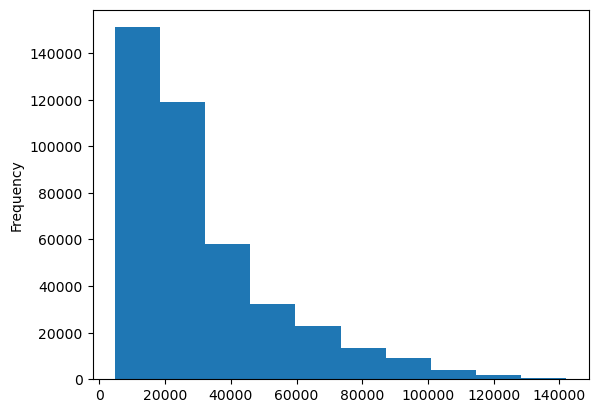

In [6]:
# view distribution of target 

df.SalePrice.plot.hist();

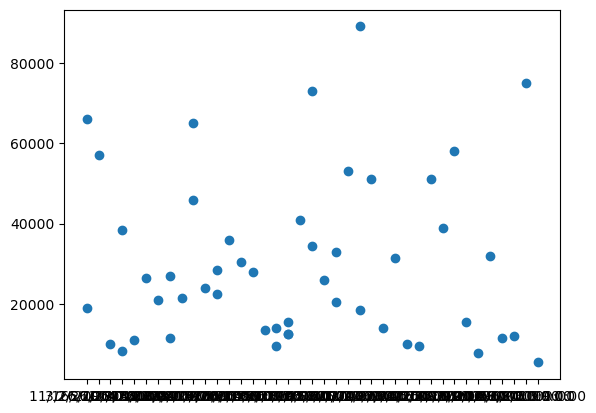

In [7]:
# view distribution of target and sale date

fig, ax = plt.subplots()
ax.scatter(df["saledate"][:50], df["SalePrice"][:50]);

## Parsing Dates

Whenever we work with dates, we need to tell pandas to convert them into a `datetime` object using `parse_dates` param

In [8]:
# import data again using parse_dates param

df = pd.read_csv("data/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [9]:
# check dtype for saledate column

df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

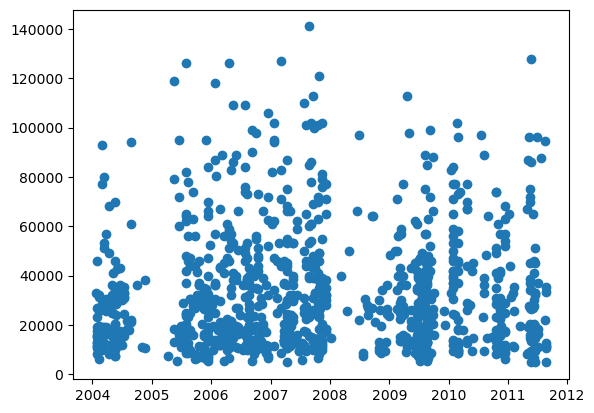

In [10]:
# view distribution of saledate and target

fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [11]:
# Sort saledate in ascending order

df.sort_values(by=["saledate"], inplace=True, ascending=True)
df["saledate"].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [30]:
# Make a copy of the original df

df_original = df.copy()

## Feature Engineering

When working with time series problem, its a good idea to enrich the data with more features from the date column. Eg is it the end of quatre, end of year, etc...

In [12]:
features = {"Year", "Month", "Day", "DayOfWeek", "DayOfYear"}

def add_features(features_list):
    for feature in features_list:
        df[f"sale{feature}"] =  getattr(df["saledate"].dt, feature.lower()) 
        
add_features(features)

In [13]:
df["saleDayOfYear"].head()

205615    17
274835    31
141296    31
212552    31
62755     31
Name: saleDayOfYear, dtype: int64

In [33]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [14]:
# we can now drop the saledate column

df.drop("saledate", axis=1, inplace=True)

In [15]:
df["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modeling

### Convert strings to categories

In [27]:
# create categories from the columns with string values

# STEP 1: Find the columns with string values
results = []
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        results.append(label)
        
print(results)

['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


In [28]:
# STEP 2: Convert the string values in the columns into pandas categories datatype

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [39]:
df["state"].head()

205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
Name: state, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [40]:
df["state"].cat.codes.head()

205615    43
274835     8
141296     8
212552     8
62755      8
dtype: int8

### Save progress

In [43]:
# save the enriched and categorized df

df.to_csv("data/train_preprocessed.csv", index=False)

In [6]:
# import it again for future use

df = pd.read_csv("data/train_preprocessed.csv", low_memory=False)
df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Fill missing values

In [16]:
# check the percentage of missing data for every column

df.isna().sum() / len(df) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [18]:
# Let's start by filling in the columns with numeric data

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleMonth
saleYear
saleDay
saleDayOfWeek
saleDayOfYear


In [19]:
# Now let's check which of the above have missing values

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [7]:
# Now that we have identified the correct columns, let's fill them in with the median

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isna().sum():
            df[label + "_is_missing"] = content.isna()
            content.fillna(content.median(), inplace=True)
            
            
df["auctioneerID"].isna().sum(), df["MachineHoursCurrentMeter"].isna().sum()

(0, 0)

In [44]:
df["MachineHoursCurrentMeter"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: MachineHoursCurrentMeter, dtype: float64

In [45]:
df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [46]:
df["auctioneerID_is_missing"].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [8]:
# Now lets fill the non-numeric columns

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # add a column to indicate that it was originally missing or not
        df[label+ "_is_missing"] = content.isna()
        
        # convert the column to contain category codes data
        df[label] = pd.Categorical(df[label]).codes + 1

In [52]:
# we add "+ 1" to the codes in order to prevent pandas assigning -1 to any missing values in those categorical columns 

In [9]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [49]:
df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [10]:
df["state"].head()

0    44
1     9
2     9
3     9
4     9
Name: state, dtype: int8

In [11]:
df["UsageBand"].head()

0    0
1    0
2    0
3    0
4    0
Name: UsageBand, dtype: int8

### Fit and score a baseline model

In [8]:
%%time

from sklearn.ensemble import RandomForestRegressor

# Split the data
X_train = df.drop("SalePrice", axis=1)
y_train = df["SalePrice"]

# Instantiate the model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(X=X_train, y=y_train)

CPU times: total: 23min 57s
Wall time: 2min 16s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [9]:
%%time

model.score(X=X_train, y=y_train)

CPU times: total: 29.6 s
Wall time: 3.02 s


0.9875400605585856

In [14]:
# this score is based on data that the model has already seen before

When working with time series problems, we can use the enriched data from the date column (i.e. saleYear, saleMonth etc...) to split the data into a training and validation/test set. In this project, we will split the data using the saleYear such that all sales done in 2012 will be for validation and the rest for training.

In [12]:
# We can create a train and valid set from the df. Remember we imported the Train&Valid dataset.

# Train set: rows that have a saleYear < 2012
df_train = df[df["saleYear"] != 2012]
df_valid =  df[df["saleYear"] == 2012]

X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

X_valid = df_valid.drop("SalePrice", axis=1)
y_valid = df_valid["SalePrice"]

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape


((401125, 102), (11573, 102), (401125,), (11573,))

In [11]:
%%time

model.fit(X_train, y_train)
model.score(X_valid, y_valid)

CPU times: total: 23min 55s
Wall time: 2min 21s


0.8728653413235296

## Building an evaluation metric

Since the competition requires us to evaluate our model using root `ROOT mean squared log error (RMSLE)`, we will have to create a custom evaluation fn using sklearn's `mean_squared_log_error (MSLE)`

* `mean_squared_log_error` eg our prediction is 10% off the actual value 
* `mean_absolute error` eg our prediction is 10$ off the actual value 

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_true, y_pred):
    """
    Calculates root mean squared log error between actual and predicted labels
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [1]:
# create a fn to evaluate our model's perfomance on the training and validation sets

def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Validation MAE": mean_absolute_error(y_valid, valid_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Validation RMSLE": rmsle(y_valid, valid_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Validation R^2": r2_score(y_valid, valid_preds)}
    print(scores)

## Testing our model on a subset (to tune hyperparameters)

In [16]:
# let's fit the model with 10000 samples instead so that we can speed up the training process
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [17]:
%%time
# Reducing the samples should speed up the training process
model.fit(X_train, y_train)

CPU times: total: 51.8 s
Wall time: 5.21 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [18]:
show_scores(model)

{'Training MAE': 5560.985563751947, 'Validation MAE': 7173.100452778017, 'Training RMSLE': 0.25782391312638075, 'Validation RMSLE': 0.25782391312638075, 'Training R^2': 0.8607048609569484, 'Validation R^2': 0.8320834237261435}


In [27]:
%%time

# let's use RandomizedSearchCV to find the best params
from sklearn.model_selection import RandomizedSearchCV

# create param_grid
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# instantiate model
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              random_state=42,
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=100,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\St3vA\LevelUp\Engineer\python\MachineLearning#ZTM\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: total: 17.2 s
Wall time: 5min 13s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [28]:
# check the best params that were found

rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [22]:
# evaluate the randomized search model

show_scores(rs_model)

{'Training MAE': 8847.988609370012, 'Validation MAE': 11298.48893542948, 'Training RMSLE': 0.3904644764183159, 'Validation RMSLE': 0.3904644764183159, 'Training R^2': 0.6858400874597035, 'Validation R^2': 0.6410887429231934}


* Notice how the scores are much WORSE than the ones we got with the baseline model. It is better to increase the `n_iter` hyperparam to 100 for example, so that sklearn can try out alot of different combinations
* Daniel ran a search with the above and found his best combination of hyperparameters
* Once you find the best params, you can use them to train a new model using those params as seen below

In [39]:
%%time

ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

# ideal_model = RandomForestRegressor(n_estimators=40,
#                                     min_samples_split=2,
#                                     min_samples_leaf=1,
#                                     max_samples=None,
#                                     max_features="auto",
#                                     n_jobs=-1,
#                                     random_state=42)

ideal_model.fit(X_train, y_train)

CPU times: total: 4min 24s
Wall time: 25.1 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [40]:
show_scores(ideal_model)

{'Training MAE': 2955.4815660106988, 'Validation MAE': 5961.36535611684, 'Training RMSLE': 0.144755813440218, 'Validation RMSLE': 0.144755813440218, 'Training R^2': 0.9587255041774946, 'Validation R^2': 0.8819134649254987}


### Test our model using the test dataset

In [56]:
df_test = pd.read_csv("data/Test.csv", low_memory=False, parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


Notice the data doesn't have the `salePrice` column. It only has the features, so it is ideally our X

In [26]:
test_preds = ideal_model.predict(df_test)

C:\Users\St3vA\LevelUp\Engineer\python\MachineLearning#ZTM\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Low'

* We get an error because the test dataset is not in the same format as the training set.
* Remember we **preprocessed** the training set before training

In [55]:
# let's create a fn for preprocessing our datasets, we should have done this at the start

def preprocess(df):
    """
    Performs transformations on a dataframe and returns it
    """
    # Enrich date column
    date_features = {"Year", "Month", "Day", "DayOfWeek", "DayOfYear"}
    for feature in date_features:
        df[f"sale{feature}"] =  getattr(df["saledate"].dt, feature.lower()) 

    df.drop("saledate", axis=1, inplace=True)
    
    # Fill in missing data
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if content.isna().sum():
                df[f"{label}_is_missing"] = content.isna()
                content.fillna(content.median(), inplace=True)
                
    # Convert non-numeric data into categories
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # add a column to indicate whether it was originally missing or not
            df[f"{label}_is_missing"] = content.isna()
            # convert the column to contain category codes data
            df[label] = pd.Categorical(df[label]).codes + 1
    
    return df

In [57]:
df_test = preprocess(df_test)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [58]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [59]:
df_test.dtypes

SalesID                         int64
MachineID                       int64
ModelID                         int64
datasource                      int64
auctioneerID                    int64
                                ...  
Backhoe_Mounting_is_missing      bool
Blade_Type_is_missing            bool
Travel_Controls_is_missing       bool
Differential_Type_is_missing     bool
Steering_Controls_is_missing     bool
Length: 101, dtype: object

In [60]:
test_preds = ideal_model.predict(df_test)

C:\Users\St3vA\LevelUp\Engineer\python\MachineLearning#ZTM\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

* Notice that df_test has 101 columns but our training sets had 102 columns. Therefore we see the error above

In [61]:
# we can check which column is missing using sets

set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [62]:
# It seems that in df_test, the above column did not have any missing values. Cheeky ninjaz...😊😊

df_test["auctioneerID_is_missing"] = False

df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True
Steering_Controls_is_missing,True,False,True,True,True


In [63]:
test_preds = ideal_model.predict(df_test)

C:\Users\St3vA\LevelUp\Engineer\python\MachineLearning#ZTM\bulldozer-price-prediction-project\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [64]:
test_preds

array([33450.10071617, 23935.34456007, 74634.35034787, ...,
       21089.85032215, 21622.02719067, 30750.48106799])

In [65]:
# Format predictions into the same format that Kaggle require

df_preds = pd.DataFrame()
df_preds["SaleId"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds

df_preds.head()

,SaleId,SalePrice
0,1227829,33450.100716
1,1227844,23935.344560
2,1227847,74634.350348
3,1227848,76307.822241
4,1227863,57951.203125


In [66]:
# Export prediction data to csv

df_preds.to_csv("data/test_predictions.csv", index=False)

### Feature importance

In [98]:
def getFeatureImportance(model, df):
    results = {}
    importance_values = model.feature_importances_
    columns = df.columns
    zipped = zip(columns, importance_values)
    for column, value in zipped:
        results[column] = value
        
    # sort ascending
    sorted_dict = dict(sorted(results.items(), key=lambda item: item[1],  reverse=True))
    print(sorted_dict)

In [99]:
getFeatureImportance(ideal_model, X_train)

{'YearMade': 0.21334406063625563, 'ProductSize': 0.15120366645206146, 'saleYear': 0.07454628533180374, 'Enclosure': 0.0574208596929905, 'fiSecondaryDesc': 0.056096505523351436, 'ModelID': 0.04909675044935206, 'fiModelDesc': 0.04633132685298138, 'fiProductClassDesc': 0.04573691389859948, 'fiBaseModel': 0.03827824420961233, 'ProductSize_is_missing': 0.03345789578568149, 'SalesID': 0.031504414476547414, 'MachineID': 0.017310488153239788, 'fiModelDescriptor': 0.015473300680904033, 'Coupler_System': 0.013743721659252412, 'Coupler_System_is_missing': 0.011315911465360252, 'saleDayOfYear': 0.009887705632183847, 'fiModelDescriptor_is_missing': 0.00662388458278632, 'Tire_Size_is_missing': 0.006620241018780504, 'Blade_Width_is_missing': 0.006000071735366281, 'state': 0.0059528404116773875, 'saleDay': 0.005590310548605008, 'Hydraulics': 0.005410044165434923, 'Engine_Horsepower': 0.004565720827715779, 'fiModelSeries': 0.0045165660033046305, 'ProductGroup': 0.0042556941193576635, 'Enclosure_Type_is

In [94]:
# plot feature importance

def plotFeatures(columns, importances, n_columns=20):
    df = (pd.DataFrame({"features": columns, "feature_importances": importances})
            .sort_values("feature_importances", ascending=False)
            .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n_columns], df["feature_importances"][:n_columns])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance");
    ax.invert_yaxis()

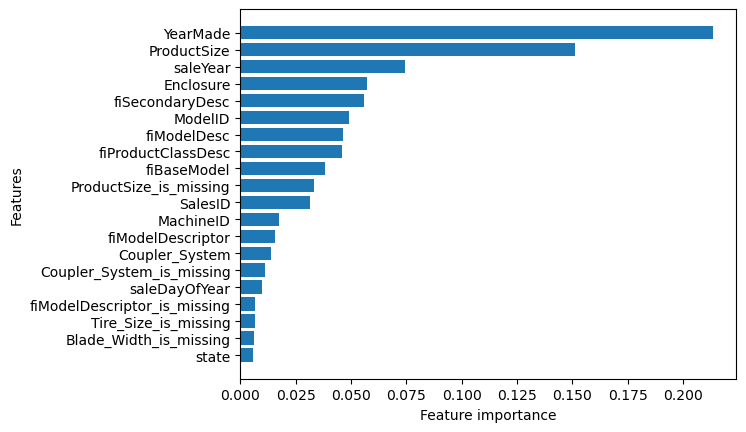

In [95]:
plotFeatures(X_train.columns, ideal_model.feature_importances_)